# LAB | Hyperparameter Tuning

**Load the data**

Finally step in order to maximize the performance on your Spaceship Titanic model.

The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

So far we've been training and evaluating models with default values for hyperparameters.

Today we will perform the same feature engineering as before, and then compare the best working models you got so far, but now fine tuning it's hyperparameters.

In [ ]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


from sklearn.metrics import confusion_matrix

In [ ]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## cleaning

In [ ]:
# Deleting all the rows with at least one missing value:
spaceship.dropna(inplace = True)

In [ ]:
# improving Cabin Column by creating a cabin_Level column (cf lab 2)
spaceship['Cabin_Level'] = spaceship['Cabin'].str[0]

In [ ]:
# Droping the 'PassengerId' and 'Name' columns
spaceship = spaceship.drop(columns=['PassengerId', 'Name'])


In [ ]:
# Transforming to integer  any column being a float
import numpy as np
for column in spaceship.columns:
  if spaceship[column].dtype == np.float64:
    spaceship[column] = spaceship[column].astype(int)


## dummy variables

In [ ]:
# Convert non-numerical columns into dummy variables
df_dummies = pd.get_dummies(spaceship, columns=['HomePlanet', 'Destination', 'Cabin_Level'])
df_dummies.sample(5)

,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_Level_A,Cabin_Level_B,Cabin_Level_C,Cabin_Level_D,Cabin_Level_E,Cabin_Level_F,Cabin_Level_G,Cabin_Level_T
4305,False,F/862/S,9,False,0,0,0,0,0,True,...,False,True,False,False,False,False,False,True,False,False
2214,False,D/81/S,36,False,0,4756,0,7818,96,False,...,False,True,False,False,False,True,False,False,False,False
2329,False,F/483/S,43,False,0,9,1145,0,0,False,...,False,True,False,False,False,False,False,True,False,False
5937,False,G/1015/P,3,False,0,0,0,0,0,False,...,False,True,False,False,False,False,False,False,True,False
7198,False,C/287/S,32,True,0,48,0,3204,112,False,...,False,False,False,False,True,False,False,False,False,False


Now perform the same as before:
- Feature Scaling
- Feature Selection


##  Train Test Split + Scaling

In [ ]:
#features
features = df_dummies[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]]
features.sample(3)

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
2328,0,0,0,0,0
3716,0,0,2,0,808
7525,6,21,0,782,0


In [ ]:
# defining our target
target = spaceship[["Transported"]]
target.sample(4)

,Transported
5673,True
7210,True
1472,False
6204,False


In [ ]:
# launching the Train Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [ ]:
# Before moving on to the model selection , let's first normalize / standardize our data points

normalizer = MinMaxScaler()

In [ ]:
# Fit it to our training data:
normalizer.fit(X_train)

MinMaxScaler()

In [ ]:
# Transforming our training and testing data
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [ ]:
# dataframing X_train_norm
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.00000,0.000000,0.000000,0.000000,0.000000
1,0.00000,0.000000,0.000000,0.000000,0.000000
2,0.00000,0.007916,0.000000,0.051276,0.000000
3,0.00131,0.000000,0.046111,0.016378,0.000049
4,0.00000,0.000000,0.000000,0.000000,0.000000


In [ ]:
# dataframing X_test_norm
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
X_test_norm.head()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,0.000000,0.0,0.00000,0.0
1,0.0,0.000000,0.0,0.00000,0.0
2,0.0,0.000000,0.0,0.00000,0.0
3,0.0,0.000000,0.0,0.00000,0.0
4,0.0,0.054775,0.0,0.07774,0.0


- Now let's use the best model we got so far in order to see how it can improve when we fine tune it's hyperparameters.

In [ ]:
# Kranta's NB: let's use bagging, as it's
# BaggingClassifier is the best as it has highest score...

bagging_class = BaggingClassifier(DecisionTreeClassifier(max_depth=20),n_estimators=100,max_samples=1000,bootstrap=False)

bagging_class.fit(X_train_norm, y_train)

pred_bagg = bagging_class.predict(X_test_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



- Evaluate your model

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_bagg))

              precision    recall  f1-score   support

       False       0.82      0.74      0.78       661
        True       0.76      0.83      0.80       661

    accuracy                           0.79      1322
   macro avg       0.79      0.79      0.79      1322
weighted avg       0.79      0.79      0.79      1322



True     723
False    599
Name: count, dtype: int64

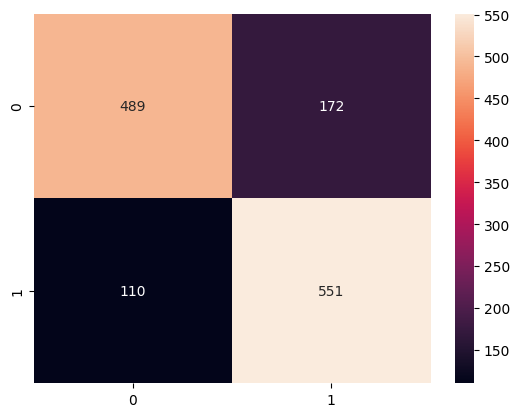

In [ ]:
sns.heatmap(confusion_matrix(y_test, pred_bagg), annot=True,fmt='g')
# confusion_matrix
y_test.value_counts()
pd.DataFrame(pred_bagg).value_counts()

In [ ]:
px.imshow(confusion_matrix(y_test, pred), text_auto=True)

Evaluation / Interpretation:


To be completed

**Grid/Random Search**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

For this lab we will use Grid Search.

- Define hyperparameters to fine tune.

In [ ]:
#defining our grid:


grid = {"n_estimators": [50, 100, 200,500],
        "estimator__max_leaf_nodes": [250, 500, 1000, None],
        "estimator__max_depth":[10,30,50]}

- Run Grid Search

In [ ]:
# Initialize GridSearchCV
grid_search = GridSearchCV(bagging_class, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_norm, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

NameError: name 'param_grid' is not defined

 n_estimators, max_samples, and bootstrap are the hyperparameters we want to tune. param_grid defines the grid of parameters to search over.

 <br>

 You can adjust the values and add more hyperparameters to the grid as needed. The cv parameter specifies the number of folds for cross-validation, and scoring specifies the evaluation metric to optimize, which in this case is accuracy. After fitting the GridSearchCV object to the data, you can access the best parameters found using the best_params_ attribute.

- Evaluate your model